In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
acidentes = pd.read_csv('US_Accidents_Dec19.csv')
acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [4]:
acidentes.sample(20)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1217945,A-1217959,MapQuest,201.0,2,2018-12-07 17:55:38,2018-12-07 18:25:20,35.084461,-82.096657,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Day,Day
2961509,A-2961533,Bing,NaN,2,2019-07-27 13:19:37,2019-07-27 17:19:37,43.138318,-124.178384,43.132876,-124.172009,...,False,False,False,False,False,False,Day,Day,Day,Day
1644159,A-1644181,MapQuest,201.0,2,2018-05-08 18:18:35,2018-05-08 18:48:27,32.734230,-96.682915,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
2119816,A-2119839,MapQuest,201.0,2,2017-09-05 20:11:34,2017-09-05 20:40:19,26.546329,-81.831078,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Day,Day
2194014,A-2194038,MapQuest,201.0,2,2017-08-07 05:42:30,2017-08-07 06:40:04,38.920731,-77.216820,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Day,Day
2966169,A-2966193,Bing,NaN,2,2019-08-06 10:47:12,2019-08-06 11:15:47,36.187750,-86.270640,36.188680,-86.266630,...,False,False,False,False,False,False,Day,Day,Day,Day
549674,A-549682,MapQuest,201.0,2,2019-12-13 17:52:02,2019-12-13 18:21:37,34.201290,-118.403557,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
637867,A-637876,MapQuest,201.0,2,2019-11-07 08:55:33,2019-11-07 09:25:20,26.593510,-81.871979,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
1447684,A-1447700,MapQuest,201.0,2,2018-09-28 15:49:32,2018-09-28 16:19:22,33.934490,-81.221016,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
401048,A-401054,MapQuest,241.0,3,2017-05-03 10:52:28,2017-05-03 11:22:10,37.847965,-122.027657,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
acidentes.drop(['End_Lat','End_Lng','Number','Street','Country','Zipcode','Description','Distance(mi)','Timezone','Airport_Code','Weather_Timestamp'],axis = 1, inplace = True)

In [6]:
acidentes.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Side,City,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,R,Dayton,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,L,Reynoldsburg,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,R,Williamsburg,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,R,Dayton,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,R,Dayton,...,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
acidentes.sample(10)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Side,City,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2877909,A-2877933,Bing,NaN,4,2017-09-10 06:00:00,2017-09-10 12:30:00,38.896010,-77.044910,L,Washington,...,False,False,False,False,True,False,Night,Night,Day,Day
1803178,A-1803201,MapQuest,201.0,2,2018-03-26 17:36:24,2018-03-26 18:39:00,34.969513,-81.963951,R,Spartanburg,...,False,False,False,False,True,False,Day,Day,Day,Day
237527,A-237529,MapQuest,201.0,3,2017-01-26 09:22:47,2017-01-26 10:07:29,38.863598,-76.996849,R,Washington,...,False,False,False,False,False,False,Day,Day,Day,Day
1504740,A-1504757,MapQuest,201.0,2,2018-08-27 08:17:11,2018-08-27 08:47:01,29.673203,-95.450356,R,Houston,...,False,False,False,False,False,False,Day,Day,Day,Day
1093623,A-1093636,MapQuest,201.0,3,2019-02-02 15:15:47,2019-02-02 16:00:05,43.004841,-78.947639,R,Grand Island,...,False,False,False,False,False,False,Day,Day,Day,Day
738082,A-738091,MapQuest,201.0,3,2019-09-10 07:05:03,2019-09-10 08:19:16,45.528999,-122.601982,R,Portland,...,False,True,False,False,False,False,Day,Day,Day,Day
2683468,A-2683492,Bing,NaN,3,2018-12-17 09:09:05,2018-12-17 09:38:27,40.519340,-74.300400,R,Keasbey,...,False,False,False,False,False,False,Day,Day,Day,Day
2517607,A-2517631,Bing,NaN,2,2019-12-18 08:31:17,2019-12-18 12:31:17,44.077660,-123.047310,R,Springfield,...,False,False,False,False,False,False,Day,Day,Day,Day
388113,A-388117,MapQuest,201.0,2,2017-03-03 09:09:41,2017-03-03 09:39:23,29.665545,-95.413124,R,Houston,...,False,False,False,False,True,False,Day,Day,Day,Day
2394691,A-2394715,Bing,NaN,2,2017-02-07 14:21:35,2017-02-07 20:22:16,39.984079,-76.726629,L,York,...,False,False,False,False,True,False,Day,Day,Day,Day


In [8]:
acidentes.isnull().sum()

ID                             0
Source                         0
TMC                       728071
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Side                           0
City                          83
County                         0
State                          0
Temperature(F)             56063
Wind_Chill(F)            1852623
Humidity(%)                59173
Pressure(in)               48142
Visibility(mi)             65691
Wind_Direction             45101
Wind_Speed(mph)           440840
Precipitation(in)        1998358
Weather_Condition          65932
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit                        0
Railway                        0
Roundabout                     0
Station                        0
Stop      

In [9]:
acidentes2 = acidentes.groupby('State',)[['ID']].count().sort_values(by='ID',ascending= False).reset_index()

In [10]:
acidentes2

,State,ID
0,CA,663204
1,TX,298062
2,FL,223746
3,SC,146689
4,NC,142460
5,NY,137799
6,PA,90395
7,MI,88694
8,IL,86390
9,GA,83620


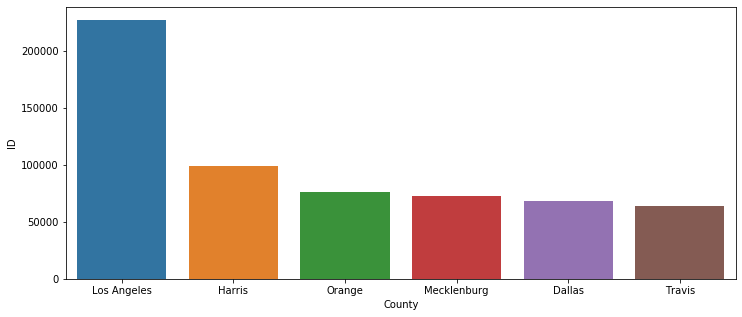

In [13]:
plt.figure(figsize = (12,5))
sns.barplot(x= 'County', y = 'ID', data = condado.sort_values(by = 'ID', ascending = False).iloc[0:6])

In [12]:
condado = acidentes.groupby('County',)[['ID']].count().sort_values(by='ID',ascending= False).reset_index()

In [14]:
condado

,County,ID
0,Los Angeles,227180
1,Harris,99134
2,Orange,75970
3,Mecklenburg,72762
4,Dallas,68558
...,...,...
1708,Hand,1
1709,Frontier,1
1710,Brewster,1
1711,Towns,1


In [15]:
acidentes.sample(10)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Side,City,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
288570,A-288573,MapQuest,241.0,3,2016-10-03 14:27:59,2016-10-03 15:27:15,32.922901,-96.899895,R,Dallas,...,False,False,False,False,True,False,Day,Day,Day,Day
2240394,A-2240418,MapQuest,201.0,2,2017-08-28 09:02:07,2017-08-28 09:31:36,37.409328,-121.998650,R,Sunnyvale,...,False,False,False,False,False,False,Day,Day,Day,Day
762601,A-762610,MapQuest,201.0,2,2019-08-22 10:46:07,2019-08-22 11:41:43,35.352539,-119.039391,R,Bakersfield,...,False,False,False,False,False,False,Day,Day,Day,Day
2945883,A-2945907,Bing,NaN,2,2019-08-28 07:44:00,2019-08-28 09:17:29,36.253844,-119.355775,R,Tulare,...,False,False,False,False,False,False,Day,Day,Day,Day
283704,A-283707,MapQuest,201.0,2,2016-11-30 10:43:38,2016-11-30 11:13:29,29.658140,-95.528008,R,Houston,...,False,False,False,False,False,False,Day,Day,Day,Day
828569,A-828578,MapQuest,201.0,2,2019-07-30 13:43:34,2019-07-30 14:43:21,34.278931,-79.907730,R,Darlington,...,False,False,False,False,False,False,Day,Day,Day,Day
752163,A-752172,MapQuest,201.0,2,2019-08-17 04:51:29,2019-08-17 08:27:24,40.947163,-73.850418,R,Yonkers,...,False,False,False,False,False,False,Night,Night,Night,Day
2358749,A-2358773,Bing,NaN,2,2016-12-07 16:10:04,2016-12-07 22:10:04,37.612174,-122.394885,R,Millbrae,...,False,False,False,False,False,False,Day,Day,Day,Day
185228,A-185230,MapQuest,201.0,3,2016-11-11 15:09:04,2016-11-11 15:38:28,42.313648,-83.091080,R,Detroit,...,False,False,False,False,False,False,Day,Day,Day,Day
2950066,A-2950090,Bing,NaN,2,2019-07-02 10:21:23,2019-07-02 10:50:29,40.593080,-74.193030,R,Staten Island,...,False,False,False,False,False,False,Day,Day,Day,Day


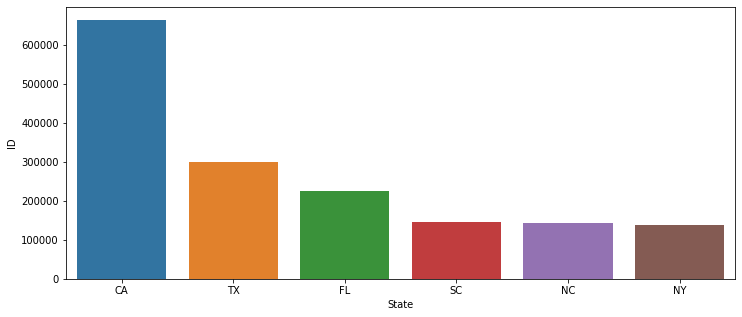

In [16]:
plt.figure(figsize = (12,5))
sns.barplot(x= 'State', y = 'ID', data = acidentes2.sort_values(by = 'ID', ascending = False).iloc[0:6])

In [17]:
acidentes10 = acidentes.groupby(['Weather_Condition'])['ID'].count().reset_index()
acidentes10

,Weather_Condition,ID
0,Blowing Dust,44
1,Blowing Dust / Windy,64
2,Blowing Sand,1
3,Blowing Snow,268
4,Blowing Snow / Windy,10
...,...,...
115,Volcanic Ash,22
116,Widespread Dust,129
117,Widespread Dust / Windy,1
118,Wintry Mix,799


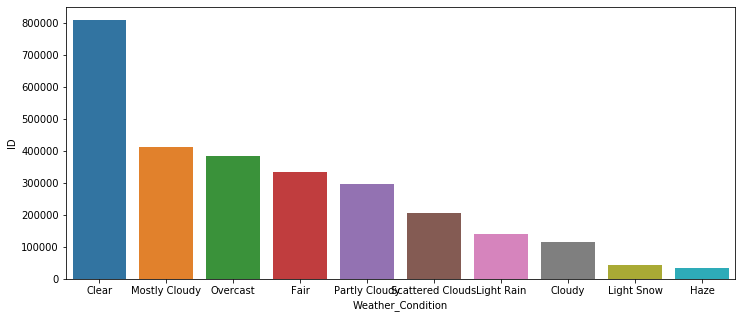

In [18]:
plt.figure(figsize = (12,5))
sns.barplot(x= 'Weather_Condition', y = 'ID', data = acidentes10.sort_values(by = 'ID', ascending = False).iloc[0:10])

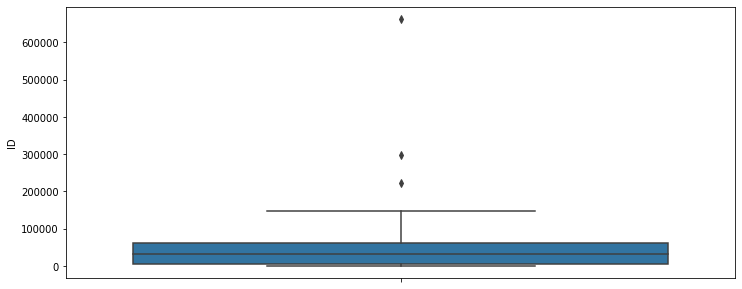

In [19]:
plt.figure(figsize = (12,5))
sns.boxplot(hue= 'State', y = 'ID', data = acidentes2)

In [20]:
acidentes.min()

ID                                   A-1
Source                              Bing
TMC                                  200
Severity                               1
Start_Time           2015-03-09 07:00:00
End_Time             2016-02-08 06:37:08
Start_Lat                        24.5553
Start_Lng                       -124.624
Side                                    
County                         Abbeville
State                                 AL
Temperature(F)                     -77.8
Wind_Chill(F)                      -65.9
Humidity(%)                            1
Pressure(in)                           0
Visibility(mi)                         0
Wind_Speed(mph)                        0
Precipitation(in)                      0
Amenity                            False
Bump                               False
Crossing                           False
Give_Way                           False
Junction                           False
No_Exit                            False
Railway         

In [21]:
acidentes.max()

ID                              A-999999
Source                     MapQuest-Bing
TMC                                  406
Severity                               4
Start_Time           2020-01-01 00:50:55
End_Time             2020-10-31 23:59:00
Start_Lat                        49.0022
Start_Lng                       -67.1132
Side                                   R
County                              Yuma
State                                 WY
Temperature(F)                     170.6
Wind_Chill(F)                        115
Humidity(%)                          100
Pressure(in)                       33.04
Visibility(mi)                       140
Wind_Speed(mph)                    822.8
Precipitation(in)                     25
Amenity                             True
Bump                                True
Crossing                            True
Give_Way                            True
Junction                            True
No_Exit                             True
Railway         

In [23]:
acidentes['Temperature(F)'] = pd.cut (acidentes["Temperature(F)"], [-77.8,-60,-40,-20,0,20,40,60,80,100,120,140,160,170.6]) 

In [24]:
acidentes.sample(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Side,City,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
375121,A-375125,MapQuest,201.0,3,2017-03-22 10:04:33,2017-03-22 10:34:04,40.691647,-73.999306,R,Brooklyn,...,False,False,False,False,True,False,Day,Day,Day,Day
152923,A-152925,MapQuest,222.0,2,2016-09-14 17:22:34,2016-09-14 17:52:34,33.615162,-84.998215,L,Carrollton,...,False,False,False,False,False,False,Day,Day,Day,Day
247696,A-247698,MapQuest,201.0,2,2016-09-29 05:50:08,2016-09-29 06:34:47,40.163784,-76.395134,R,Manheim,...,False,False,False,False,True,False,Night,Night,Night,Day
2338096,A-2338120,Bing,NaN,2,2016-07-12 09:02:23,2016-07-12 15:02:23,40.700760,-73.990010,R,Brooklyn,...,False,False,False,False,True,False,Day,Day,Day,Day
588504,A-588513,MapQuest,201.0,2,2019-10-15 08:36:02,2019-10-15 10:05:51,34.819962,-82.256363,R,Greenville,...,False,False,False,False,True,False,Day,Day,Day,Day


In [25]:
acidentes['Start_Time'] = pd.to_datetime(acidentes['Start_Time'], errors='coerce')
acidentes['End_Time'] = pd.to_datetime(acidentes['End_Time'], errors='coerce')

In [26]:
acidentes.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Side,City,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,R,Dayton,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,L,Reynoldsburg,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,R,Williamsburg,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,R,Dayton,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,R,Dayton,...,False,False,False,False,True,False,Day,Day,Day,Day


In [27]:
acidentes['ano']=acidentes['Start_Time'].dt.year
acidentes['mes']=acidentes['Start_Time'].dt.strftime('%b')
acidentes['dia']=acidentes['Start_Time'].dt.day
acidentes['hora']=acidentes['Start_Time'].dt.hour
acidentes['diasemana']=acidentes['Start_Time'].dt.strftime('%a')

In [28]:
acidentes.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Side,City,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,ano,mes,dia,hora,diasemana
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,R,Dayton,...,False,Night,Night,Night,Night,2016,Feb,8,5,Mon
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,L,Reynoldsburg,...,False,Night,Night,Night,Day,2016,Feb,8,6,Mon
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,R,Williamsburg,...,False,Night,Night,Day,Day,2016,Feb,8,6,Mon
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,R,Dayton,...,False,Night,Day,Day,Day,2016,Feb,8,7,Mon
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,R,Dayton,...,False,Day,Day,Day,Day,2016,Feb,8,7,Mon


In [29]:
acidentes7 = acidentes[acidentes['State'] == "TX"].groupby(['County'])['ID'].count().reset_index()
acidentes7

,County,ID
0,Anderson,11
1,Andrews,4
2,Angelina,81
3,Archer,12
4,Armstrong,3
...,...,...
208,Winkler,2
209,Wise,7
210,Wood,5
211,Yoakum,8


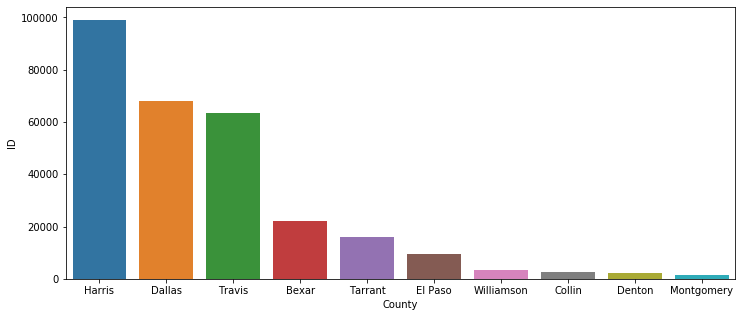

In [30]:
plt.figure(figsize = (12,5))
sns.barplot(x= 'County', y = 'ID', data = acidentes7.sort_values(by = 'ID', ascending = False).iloc[0:10])

In [31]:
acidentes8 = acidentes[acidentes['State'] == "CA"].groupby(['County'])['ID'].count().reset_index()
acidentes8

,County,ID
0,Alameda,45367
1,Alpine,60
2,Amador,758
3,Butte,1413
4,Calaveras,927
5,Colusa,375
6,Contra Costa,23059
7,Del Norte,192
8,El Dorado,3030
9,Fresno,6998


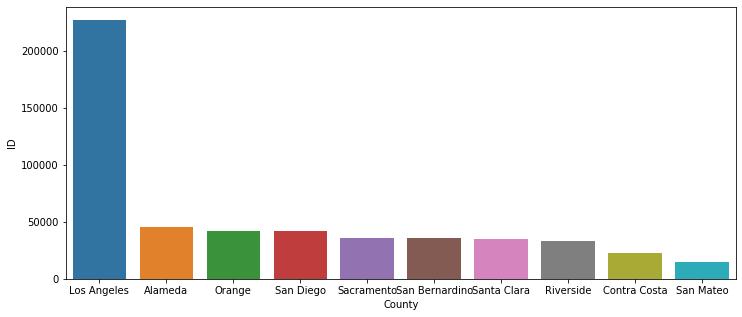

In [32]:
plt.figure(figsize = (12,5))
sns.barplot(x= 'County', y = 'ID', data = acidentes8.sort_values(by = 'ID', ascending = False).iloc[0:10])

In [33]:
acidentes9 = acidentes[acidentes['State'] == "FL"].groupby(['County'])['ID'].count().reset_index()
acidentes9

,County,ID
0,Alachua,1485
1,Baker,379
2,Bay,633
3,Bradford,152
4,Brevard,3486
...,...,...
65,Union,35
66,Volusia,2841
67,Wakulla,128
68,Walton,436


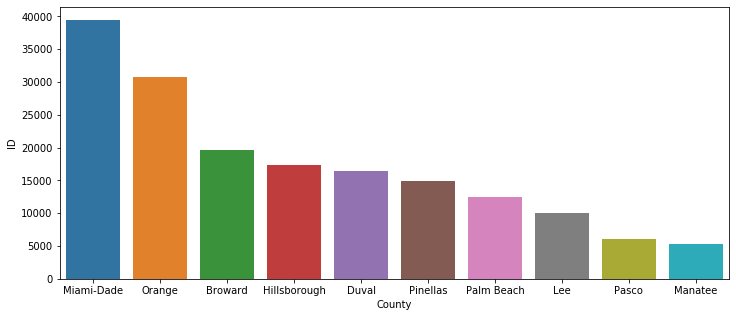

In [34]:
plt.figure(figsize = (12,5))
sns.barplot(x= 'County', y = 'ID', data = acidentes9.sort_values(by = 'ID', ascending = False).iloc[0:10])

In [35]:
acidentes['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

In [36]:
acidentes['Temperature(F)']

0           (20.0, 40.0]
1           (20.0, 40.0]
2           (20.0, 40.0]
3           (20.0, 40.0]
4           (20.0, 40.0]
               ...      
2974330    (80.0, 100.0]
2974331     (60.0, 80.0]
2974332     (60.0, 80.0]
2974333     (60.0, 80.0]
2974334     (60.0, 80.0]
Name: Temperature(F), Length: 2974335, dtype: category
Categories (13, interval[float64]): [(-77.8, -60.0] < (-60.0, -40.0] < (-40.0, -20.0] < (-20.0, 0.0] ... (100.0, 120.0] < (120.0, 140.0] < (140.0, 160.0] < (160.0, 170.6]]

In [37]:
acidentes11 = acidentes[acidentes['State']=="TX"].groupby(['Temperature(F)'])['ID'].count().reset_index()
acidentes11

,Temperature(F),ID
0,"(-77.8, -60.0]",0
1,"(-60.0, -40.0]",1
2,"(-40.0, -20.0]",0
3,"(-20.0, 0.0]",0
4,"(0.0, 20.0]",195
5,"(20.0, 40.0]",11080
6,"(40.0, 60.0]",58118
7,"(60.0, 80.0]",127029
8,"(80.0, 100.0]",94225
9,"(100.0, 120.0]",1448


In [38]:
acidentes['Pressure'] = pd.cut (acidentes["Pressure(in)"], [0,5,10,15,20,25,30,35]) 

In [39]:
acidentes['Pressure(in)'].min()

0.0

In [40]:
acidentes['Pressure(in)'].max()

33.04

In [41]:
acidentes12 = acidentes.groupby(['Pressure'])['ID'].count().reset_index()
acidentes12

,Pressure,ID
0,"(0, 5]",29
1,"(5, 10]",2
2,"(10, 15]",0
3,"(15, 20]",7
4,"(20, 25]",17702
5,"(25, 30]",1600314
6,"(30, 35]",1308137


In [42]:
acidentes['Precipitation(in)'].isna().sum()

1998358

In [43]:
acidentes['Precipitation(in)'].fillna(value = 0, inplace = True)

In [44]:
acidentes['Precipitation(in)'].isna().sum()

0

In [45]:
acidentes['Precipitation(in)'].min()

0.0

In [46]:
acidentes['Precipitation(in)'].max()

25.0

In [47]:
acidentes['Precipitation'] = pd.cut (acidentes["Precipitation(in)"], [0,5,10,15,20,25]) 

In [48]:
acidentes13 = acidentes.groupby(['Precipitation'])['ID'].count().reset_index()
acidentes13

,Precipitation,ID
0,"(0, 5]",198803
1,"(5, 10]",441
2,"(10, 15]",51
3,"(15, 20]",0
4,"(20, 25]",2


In [49]:
acidentes['Humidity(%)'].min() 

1.0

In [50]:
acidentes['Humidity(%)'].max()

100.0

In [51]:
acidentes['Humidity'] = pd.cut (acidentes["Humidity(%)"], [0,10,20,30,40,50.60,70,80,90,100]) 

In [52]:
acidentes14 = acidentes.groupby(['Humidity'])['ID'].count().reset_index()
acidentes14

,Humidity,ID
0,"(0.0, 10.0]",19525
1,"(10.0, 20.0]",73851
2,"(20.0, 30.0]",138614
3,"(30.0, 40.0]",229080
4,"(40.0, 50.6]",321143
5,"(50.6, 70.0]",800578
6,"(70.0, 80.0]",419039
7,"(80.0, 90.0]",491851
8,"(90.0, 100.0]",421481


In [53]:
acidentes['Visibility(mi)'].min() 

0.0

In [54]:
acidentes['Visibility(mi)'].max() 

140.0

In [55]:
acidentes['Visibility'] = pd.cut (acidentes["Visibility(mi)"], [0,20,40,60,80,100,120,140]) 

In [56]:
acidentes15 = acidentes.groupby(['Visibility'])['ID'].count().reset_index()
acidentes15

,Visibility,ID
0,"(0, 20]",2899794
1,"(20, 40]",5133
2,"(40, 60]",2585
3,"(60, 80]",318
4,"(80, 100]",5
5,"(100, 120]",6
6,"(120, 140]",3


In [183]:
acidentes16 = acidentes[acidentes['State']=='NY'].groupby(['Weather_Condition'])['ID'].count().reset_index()
acidentes16

,Weather_Condition,ID
0,Blowing Snow,73
1,Clear,23147
2,Cloudy,5893
3,Cloudy / Windy,100
4,Drizzle,72
...,...,...
62,Thunderstorm,76
63,Thunderstorms and Rain,46
64,Thunderstorms and Snow,1
65,Wintry Mix,110


In [184]:
acidentes16.sort_values(by = 'ID', ascending = False).iloc[:30]

,Weather_Condition,ID
43,Mostly Cloudy,27108
1,Clear,23147
46,Overcast,20089
47,Partly Cloudy,15875
52,Scattered Clouds,10677
6,Fair,10412
31,Light Rain,8819
36,Light Snow,6041
2,Cloudy,5893
50,Rain,1589


In [69]:
acidentes17 = acidentes[acidentes['State'].isin((['TX','CA']))].groupby(['Weather_Condition'])['ID'].count().reset_index()
acidentes17

,Weather_Condition,ID
0,Blowing Dust,43
1,Blowing Dust / Windy,57
2,Blowing Sand,1
3,Clear,329823
4,Cloudy,34122
...,...,...
77,Thunderstorms and Snow,1
78,Volcanic Ash,12
79,Widespread Dust,100
80,Widespread Dust / Windy,1


In [70]:
acidentes17.sort_values(by = 'ID', ascending = False).iloc[:10]

,Weather_Condition,ID
3,Clear,329823
9,Fair,127662
46,Mostly Cloudy,108388
49,Overcast,103607
51,Partly Cloudy,96614
59,Scattered Clouds,54712
4,Cloudy,34122
35,Light Rain,30922
14,Haze,24019
54,Rain,8895


In [74]:
acidentes_final = acidentes[acidentes['State'].isin((['TX','CA','FL']))]

In [75]:
acidentes_final.sample(20)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Side,City,...,Astronomical_Twilight,ano,mes,dia,hora,diasemana,Pressure,Precipitation,Humidity,Visibility
2496320,A-2496344,Bing,NaN,2,2019-12-03 18:43:00,2019-12-03 19:38:28,32.843104,-117.086109,R,San Diego,...,Night,2019,Dec,3,18,Tue,"(25, 30]",NaN,"(70.0, 80.0]","(0, 20]"
2258206,A-2258230,Bing,NaN,2,2016-06-16 13:36:04,2016-06-16 19:36:04,33.814860,-118.183360,R,Long Beach,...,Day,2016,Jun,16,13,Thu,"(30, 35]",NaN,"(40.0, 50.6]","(0, 20]"
2553883,A-2553907,Bing,NaN,2,2019-10-25 06:09:00,2019-10-25 09:00:38,34.279088,-118.469644,R,Mission Hills,...,Day,2019,Oct,25,6,Fri,"(25, 30]",NaN,"(10.0, 20.0]","(0, 20]"
2339015,A-2339039,Bing,NaN,2,2016-07-14 12:49:51,2016-07-14 18:49:51,28.450450,-81.427810,R,Orlando,...,Day,2016,Jul,14,12,Thu,"(30, 35]",NaN,"(40.0, 50.6]","(0, 20]"
1009704,A-1009716,MapQuest,241.0,3,2019-04-18 04:28:16,2019-04-18 06:27:07,37.830807,-122.266968,R,Oakland,...,Night,2019,Apr,18,4,Thu,"(30, 35]",NaN,"(80.0, 90.0]","(0, 20]"
410429,A-410435,MapQuest,201.0,2,2017-04-09 15:59:29,2017-04-09 16:44:29,27.674183,-80.462868,R,Vero Beach,...,Day,2017,Apr,9,15,Sun,"(30, 35]",NaN,"(50.6, 70.0]","(0, 20]"
314307,A-314310,MapQuest,203.0,2,2017-01-27 18:23:23,2017-01-27 19:07:35,37.084328,-122.268211,L,Davenport,...,Day,2017,Jan,27,18,Fri,"(30, 35]",NaN,"(70.0, 80.0]","(0, 20]"
1591284,A-1591303,MapQuest,201.0,2,2018-06-12 17:56:37,2018-06-12 18:26:12,38.639835,-121.196815,R,Rancho Cordova,...,Day,2018,Jun,12,17,Tue,"(25, 30]",NaN,"(10.0, 20.0]","(0, 20]"
87024,A-87026,MapQuest,201.0,3,2016-08-05 21:39:43,2016-08-05 22:24:43,33.878944,-118.285240,R,Gardena,...,Night,2016,Aug,5,21,Fri,"(25, 30]",NaN,"(90.0, 100.0]","(0, 20]"
1071596,A-1071609,MapQuest,201.0,2,2019-03-25 07:19:55,2019-03-25 08:34:51,32.633099,-96.865692,L,Desoto,...,Day,2019,Mar,25,7,Mon,"(30, 35]",NaN,"(50.6, 70.0]","(0, 20]"


In [76]:
acidentes_final['State'].unique()

array(['CA', 'FL', 'TX'], dtype=object)

In [87]:
acidentes_final_clima = acidentes_final.groupby(['Weather_Condition'])['ID'].count().reset_index()

In [89]:
acidentes_final_clima.sort_values(by = 'ID', ascending = False).iloc[:15]

,Weather_Condition,ID
3,Clear,388979
49,Mostly Cloudy,149629
9,Fair,149476
54,Partly Cloudy,125230
52,Overcast,119495
62,Scattered Clouds,83401
37,Light Rain,40360
4,Cloudy,37972
15,Haze,24489
57,Rain,10944


In [160]:
dayofweek = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
acidentes['diasemana'] = pd.Categorical(acidentes['diasemana'], categories=dayofweek, ordered=True)

In [161]:
acidentesdiasem = acidentes[acidentes['State']=='NY'].groupby(['diasemana'])['ID'].count().reset_index()
acidentesdiasem

,diasemana,ID
0,Sun,8049
1,Mon,23798
2,Tue,25450
3,Wed,24742
4,Thu,23890
5,Fri,24415
6,Sat,7455


In [ ]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
acidentes['mes'] = pd.Categorical(acidentes['mes'], categories=months, ordered=True)

In [239]:
acidentesmes = acidentes[acidentes['State']=='PA'].groupby(['mes'])['ID'].count().reset_index()
acidentesmes.sample(10)

,mes,ID
10,Nov,9198
8,Sep,8906
0,Jan,6909
1,Feb,6452
11,Dec,8611
3,Apr,6031
5,Jun,6764
6,Jul,7201
9,Oct,9532
7,Aug,8187


In [237]:
#acidentes.columns
acidentesperiodo = acidentes[acidentes['State']=='NY'].groupby(['Civil_Twilight'])['ID'].count().reset_index()
acidentesperiodo

,Civil_Twilight,ID
0,Day,108709
1,Night,29070


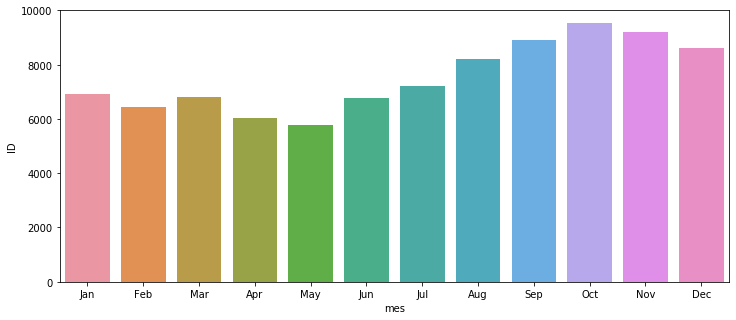

In [240]:
plt.figure(figsize = (12,5))
sns.barplot(x= 'mes', y = 'ID', data = acidentesmes.sort_values(by = 'mes', ascending = True))

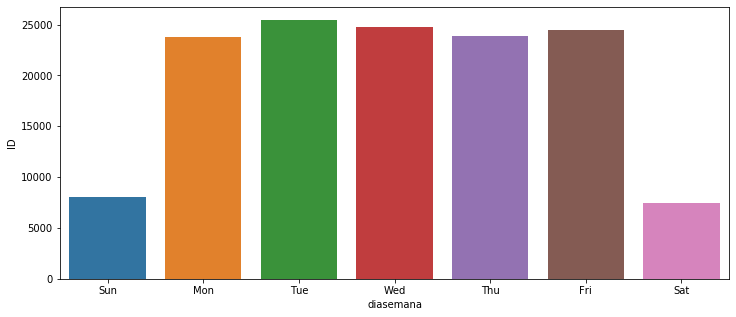

In [162]:
plt.figure(figsize = (12,5))
sns.barplot(x= 'diasemana', y = 'ID', data = acidentesdiasem.sort_values(by = 'diasemana', ascending = True))

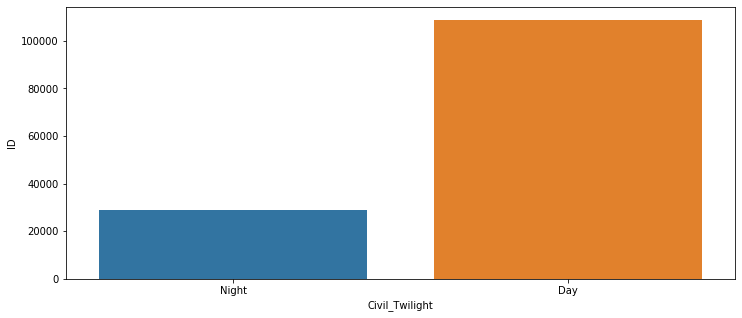

In [118]:
plt.figure(figsize = (12,5))
sns.barplot(x= 'Civil_Twilight', y = 'ID', data = acidentesperiodo.sort_values(by = 'ID', ascending = True))

In [119]:
acidentes.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'Side', 'City', 'County', 'State',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'ano', 'mes', 'dia', 'hora', 'diasemana',
       'Pressure', 'Precipitation', 'Humidity', 'Visibility'],
      dtype='object')

In [218]:
acidentes_sinal = acidentes[acidentes['State']=='NY'].groupby(['Traffic_Signal','Severity'])['ID'].count().reset_index()
acidentes_sinal

,Traffic_Signal,Severity,ID
0,False,1,18
1,False,2,67744
2,False,3,46275
3,False,4,4700
4,True,1,4
5,True,2,14644
6,True,3,3693
7,True,4,721


In [124]:
acidentes_prioridade = acidentes[acidentes['State']=='NY'].groupby(['Give_Way'])['ID'].count().reset_index()
acidentes_prioridade

,Give_Way,ID
0,False,137464
1,True,335


In [125]:
acidentes_pare = acidentes[acidentes['State']=='NY'].groupby(['Stop'])['ID'].count().reset_index()
acidentes_pare

,Stop,ID
0,False,136140
1,True,1659


In [128]:
acidentes_sem_saida= acidentes[acidentes['State']=='NY'].groupby(['No_Exit'])['ID'].count().reset_index()
acidentes_sem_saida

,No_Exit,ID
0,False,137690
1,True,109


In [130]:
acidentes_rodovia = acidentes[acidentes['State']=='NY'].groupby(['Railway'])['ID'].count().reset_index()
acidentes_rodovia

,Railway,ID
0,False,136915
1,True,884


In [131]:
acidentes_calmo = acidentes[acidentes['State']=='NY'].groupby(['Traffic_Calming'])['ID'].count().reset_index()
acidentes_calmo

,Traffic_Calming,ID
0,False,137797
1,True,2


In [219]:
acidentes_juncao = acidentes[acidentes['State']=='NY'].groupby(['Junction','Severity'])['ID'].count().reset_index()
acidentes_juncao

,Junction,Severity,ID
0,False,1,22
1,False,2,73540
2,False,3,43750
3,False,4,4956
4,True,2,8848
5,True,3,6218
6,True,4,465


In [133]:
acidentes_Bump = acidentes[acidentes['State']=='NY'].groupby(['Bump'])['ID'].count().reset_index()
acidentes_Bump

,Bump,ID
0,False,137797
1,True,2


In [135]:
acidentes_rotaroria = acidentes[acidentes['State']=='NY'].groupby(['Roundabout'])['ID'].count().reset_index()
acidentes_rotaroria

,Roundabout,ID
0,False,137793
1,True,6


In [136]:
acidentes_Amenity = acidentes[acidentes['State']=='NY'].groupby(['Amenity'])['ID'].count().reset_index()
acidentes_Amenity

,Amenity,ID
0,False,134815
1,True,2984


In [137]:
acidentes_cruzamento = acidentes[acidentes['State']=='NY'].groupby(['Crossing'])['ID'].count().reset_index()
acidentes_cruzamento

,Crossing,ID
0,False,132205
1,True,5594


In [138]:
acidentes_station = acidentes[acidentes['State']=='NY'].groupby(['Station'])['ID'].count().reset_index()
acidentes_station

,Station,ID
0,False,135075
1,True,2724


In [139]:
acidentes_Turning_Loop = acidentes[acidentes['State']=='NY'].groupby(['Turning_Loop'])['ID'].count().reset_index()
acidentes_Turning_Loop

,Turning_Loop,ID
0,False,137799


In [140]:
acidenteshora = acidentes[acidentes['State']=='NY'].groupby(['hora'])['ID'].count().reset_index()
acidenteshora

,hora,ID
0,0,1346
1,1,750
2,2,793
3,3,791
4,4,2445
5,5,4301
6,6,8631
7,7,14605
8,8,15823
9,9,9219


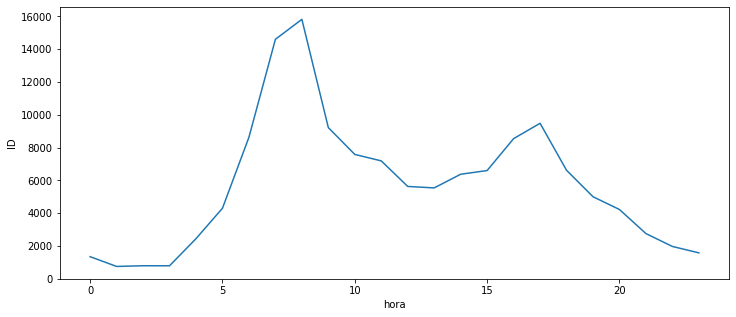

In [141]:
plt.figure(figsize = (12,5))
sns.lineplot(x= 'hora', y = 'ID', data = acidenteshora.sort_values(by = 'hora', ascending = True))

In [142]:
acidentesano = acidentes[acidentes['State']=='NY'].groupby(['ano'])['ID'].count().reset_index()
acidentesano

,ano,ID
0,2016,20026
1,2017,36878
2,2018,37958
3,2019,42936
4,2020,1


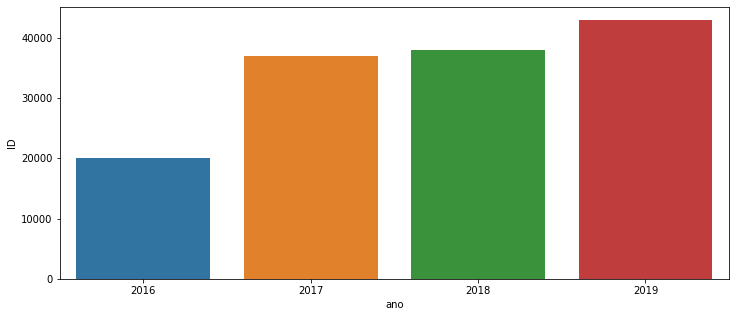

In [147]:
plt.figure(figsize = (12,5))
sns.barplot(x= 'ano', y = 'ID', data = acidentesano.sort_values(by = 'ano', ascending = True).iloc[:4])

In [178]:
acidentesanomes = acidentes[acidentes['State']=='NY'].groupby(['ano','mes'])['ID'].count().reset_index()
acidentesanomes

,ano,mes,ID
0,2016,Jan,0
1,2016,Feb,0
2,2016,Mar,271
3,2016,Apr,737
4,2016,May,801
5,2016,Jun,1490
6,2016,Jul,2368
7,2016,Aug,2732
8,2016,Sep,2665
9,2016,Oct,2694


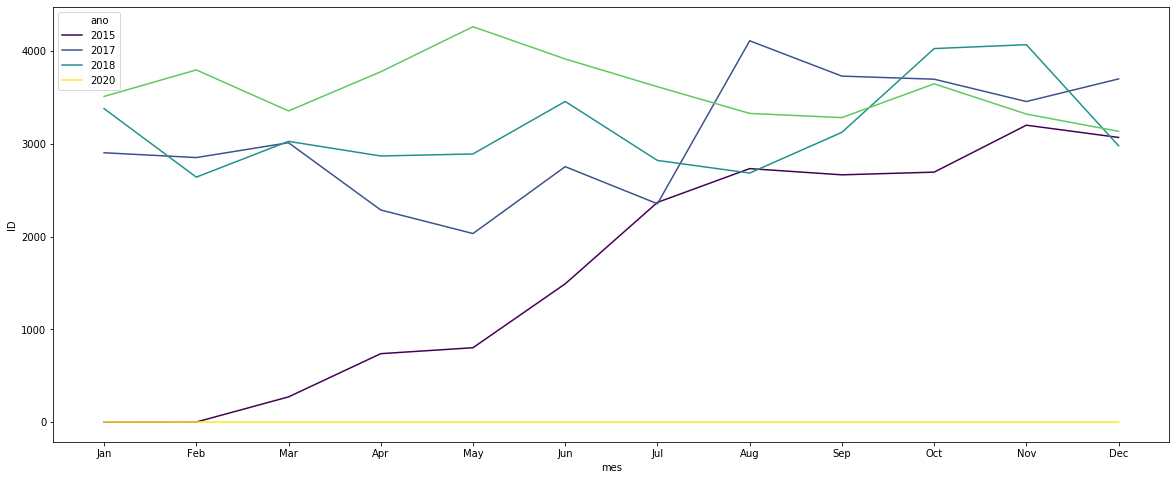

In [182]:
plt.figure(figsize = (20,8))
sns.lineplot(x= 'mes', y = 'ID',hue = 'ano', data = acidentesanomes,palette = 'viridis')


In [185]:
acidentesseveridademes = acidentes[acidentes['State']=='NY'].groupby(['mes','Severity'])['ID'].count().reset_index()
acidentesseveridademes

,mes,Severity,ID
0,Jan,1,0
1,Jan,2,5522
2,Jan,3,3904
3,Jan,4,367
4,Feb,1,1
5,Feb,2,5490
6,Feb,3,3433
7,Feb,4,363
8,Mar,1,1
9,Mar,2,5813


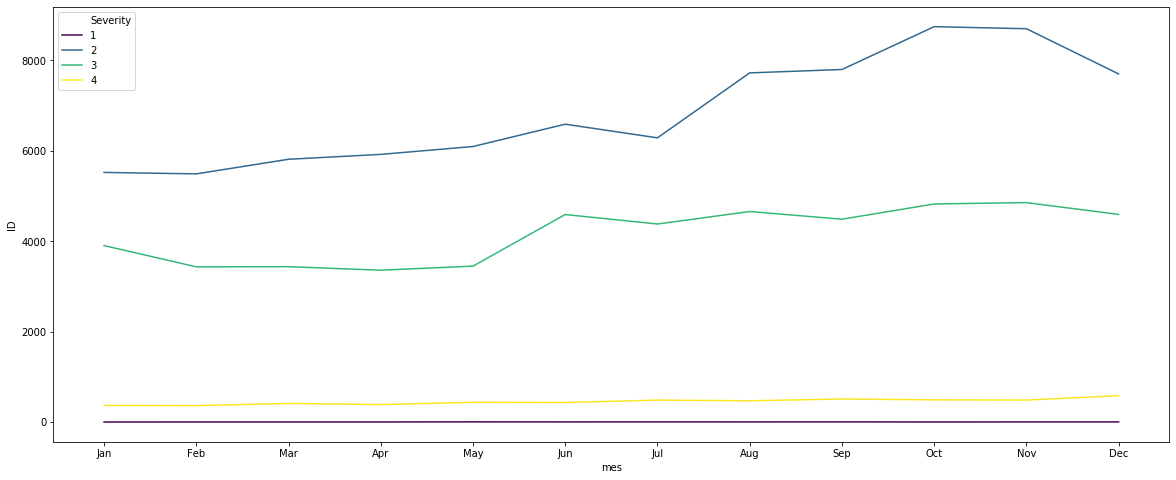

In [186]:
plt.figure(figsize = (20,8))
sns.lineplot(x= 'mes', y = 'ID',hue = 'Severity', data = acidentesseveridademes,palette = 'viridis')


In [188]:
acidentesseveridade = acidentes[acidentes['State']=='NY'].groupby(['Civil_Twilight','Severity'])['ID'].count().reset_index()
acidentesseveridade

,Civil_Twilight,Severity,ID
0,Day,1,17
1,Day,2,67947
2,Day,3,37352
3,Day,4,3393
4,Night,1,5
5,Night,2,14425
6,Night,3,12616
7,Night,4,2024


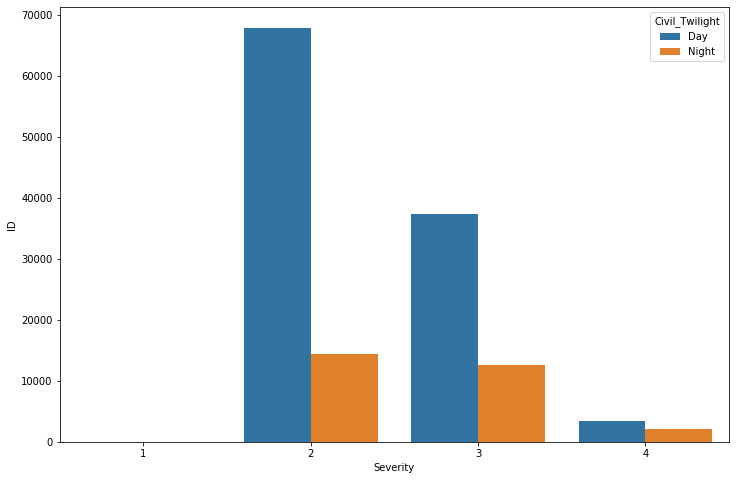

In [192]:
plt.figure(figsize =(12,8))
sns.barplot(x = 'Severity', y = 'ID', hue = 'Civil_Twilight', data = acidentesseveridade)

In [232]:
acidentesseveridadeclima = acidentes[acidentes['State'] == 'NY'].groupby(['Severity','Weather_Condition'])['ID'].count().reset_index()
acidentesseveridadeclima.sample(15)

,Severity,Weather_Condition,ID
25,2,Heavy T-Storm / Windy,2
97,3,Light Rain Showers,1
143,4,Light Blowing Snow,2
12,2,Drizzle and Fog,10
5,1,Partly Cloudy,6
15,2,Fog,819
85,3,Heavy T-Storm,15
9,2,Cloudy,4236
62,2,Thunder / Windy,1
107,3,N/A Precipitation,1


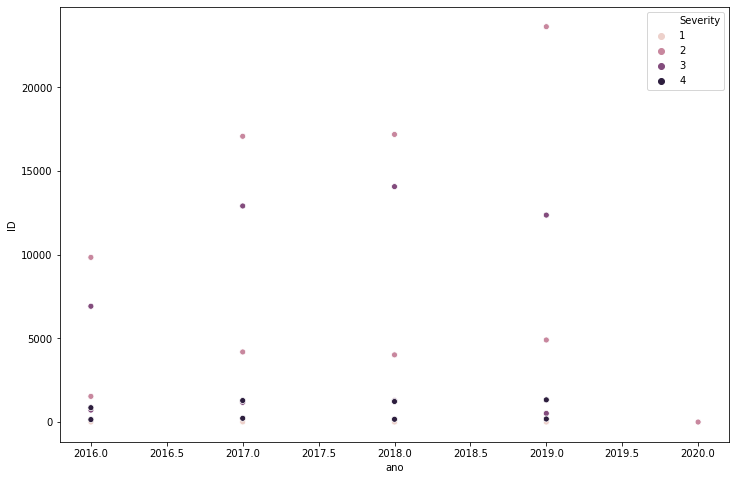

In [231]:
plt.figure(figsize = (12,8))
sns.scatterplot( x = 'ano', y = 'ID', hue = 'Severity', data = acidentesseveridadeclima)

In [233]:
acidentesny = acidentes[acidentes['State'] == 'PA']

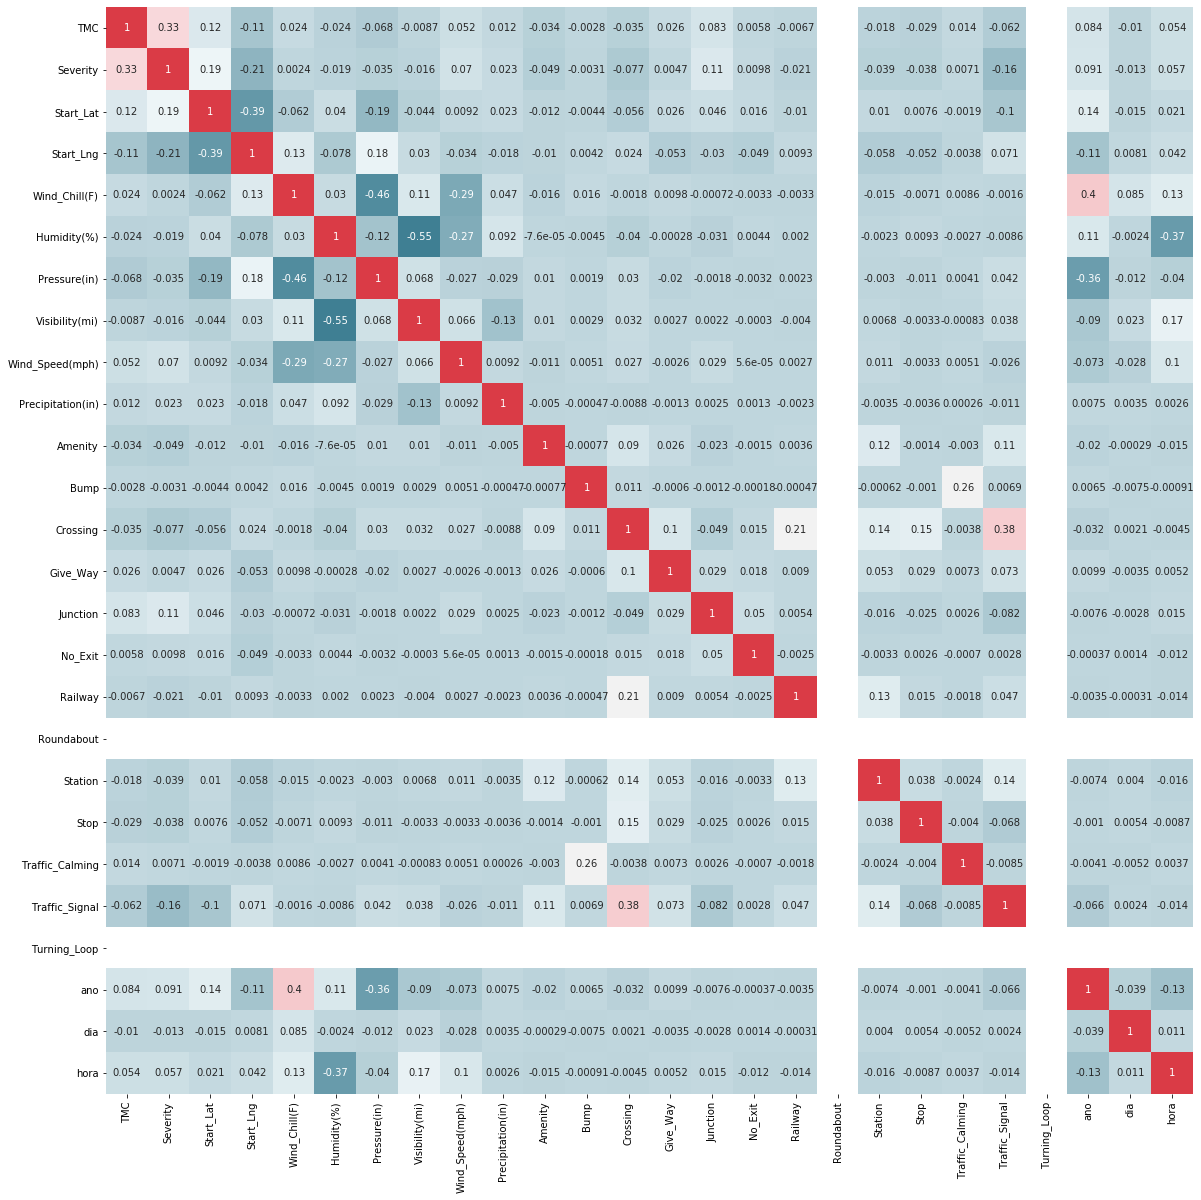

In [234]:
plt.figure(figsize = (40,20))
sns.heatmap(acidentesny.corr(), cbar=False, annot = True, cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True)